In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [2]:
# Load the MNIST Fashion dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape and normalize the input data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Convert the target labels to categorical
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [4]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)



Epoch 1/10
1500/1500 [==============================] - 54s 35ms/step - loss: 0.5104 - accuracy: 0.8161 - val_loss: 0.4029 - val_accuracy: 0.8550
Epoch 2/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.3298 - accuracy: 0.8806 - val_loss: 0.3226 - val_accuracy: 0.8876
Epoch 3/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2829 - accuracy: 0.8968 - val_loss: 0.2813 - val_accuracy: 0.8997
Epoch 4/10
1500/1500 [==============================] - 52s 34ms/step - loss: 0.2504 - accuracy: 0.9081 - val_loss: 0.2837 - val_accuracy: 0.8991
Epoch 5/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.2227 - accuracy: 0.9186 - val_loss: 0.2659 - val_accuracy: 0.9058
Epoch 6/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.2029 - accuracy: 0.9261 - val_loss: 0.2669 - val_accuracy: 0.9050
Epoch 7/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.1845 - accuracy: 0.9316 - val_loss: 0.2643 -

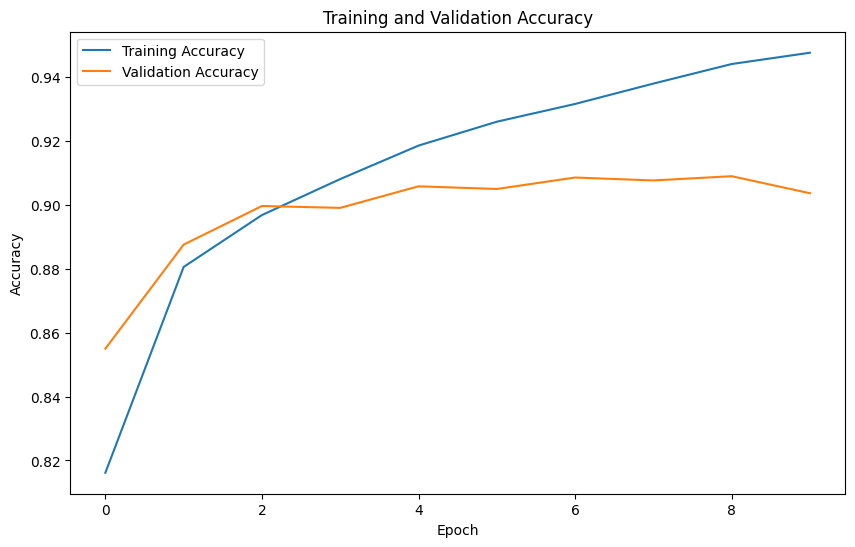

In [5]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [6]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


313/313 [==============================] - 3s 8ms/step - loss: 0.3029 - accuracy: 0.9039
Test Loss: 0.3029018044471741
Test Accuracy: 0.9039000272750854
